In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
from PIL import Image
from io import BytesIO
mpl.rc('figure', dpi=400, figsize=(12,8))


%matplotlib inline

In [2]:
def TIFF_exporter(fig, fname, fig_dir = '.'):
    """
    Parameters
    ----------
    fig: matplotlib figure
    """
    
    # save figure
    # (1) save the image in memory in PNG format
    png1 = BytesIO()
    fig.savefig(png1, format='png', bbox_inches='tight', dpi=350)

    # (2) load this image into PIL
    png2 = Image.open(png1)

    # (3) save as TIFF
    png2.save(os.path.join(fig_dir,'{}.tiff'.format(fname)))
    png1.close()
    return True

# Simulated Healthy Data #

In [8]:
df_healthy = pd.read_csv('hypoxia/healthy/scaled_inflection/sensitivities.txt', sep='\t')
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_healthy = df_healthy.query("Parameter!='{}'".format(p))
    
df_experimental = pd.read_csv('hypoxia/experimental/filtered/scaled_inflection/sensitivities.txt', sep='\t')
for p in (['u', 'P_a', 'SaO2sup', 'Pa_CO2']):#,"k_aut"]):    
    df_experimental = df_experimental.query("Parameter!='{}'".format(p))

In [9]:
sim_title_dict = {"TOTAL": "all outputs", "CCO": "cytochrome-c-oxidase", "HbO2": "oxyhaemoglobin", "HHb": "deoxyhaemoglobin", "TOI": "TOI"}
exp_title_dict = {"TOTAL": "all outputs", "CCO": "cytochrome-c-oxidase", "HbT": "total haemoglobin", "HbD": "haemoglobin difference", "TOI": "TOI"}

def sensitivity(df, output, title_dict=None):      
    params = [output+"_mu_star", output+"_sigma", "Parameter"]
    sens = df[params]
    sens = sens.rename(columns={output+"_mu_star": "mu_star", output+"_sigma": "sigma"})
    sens.sort_values(by="mu_star", ascending=False, inplace=True)
    sens_head = sens.head(10)
    with sns.plotting_context("talk"):
        fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))
        if output != "CCO":
            ax.set(xscale="log", yscale="log")
        plt.grid(True, linestyle=':')
        ax = sns.scatterplot(x="mu_star", y="sigma", data=sens_head, ax=ax, hue="Parameter")
        ax.set_ylabel("$\sigma$")
        ax.set_xlabel("$\mu_{*}$")
        if title_dict:
            ax.set_title("Sensitivity for {}".format(title_dict[output]))
        if output != "CCO":
            lgd = ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
        else:
            lgd = ax.legend(loc="upper right", bbox_to_anchor=(1.55, 1))

    
    return fig, ax, lgd, sens_head

Working on TOTAL
Working on HHb
Working on HbO2
Working on CCO
Working on TOI


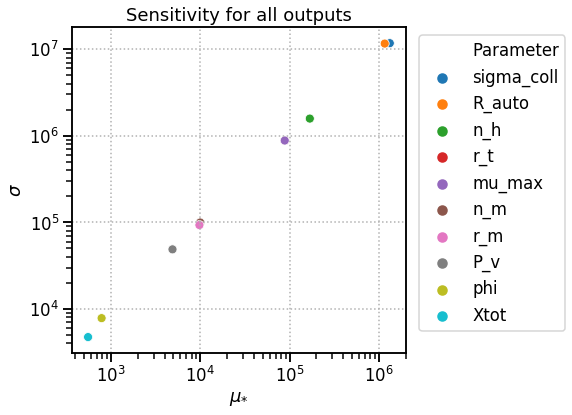

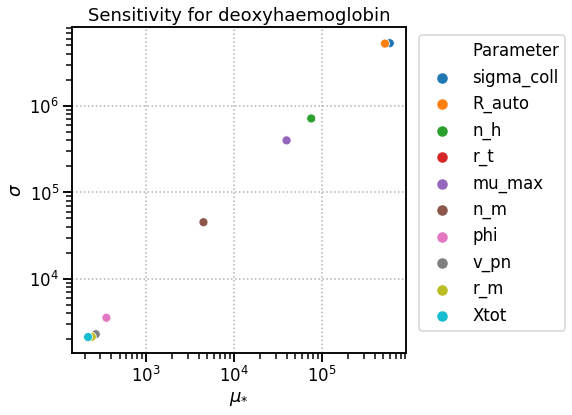

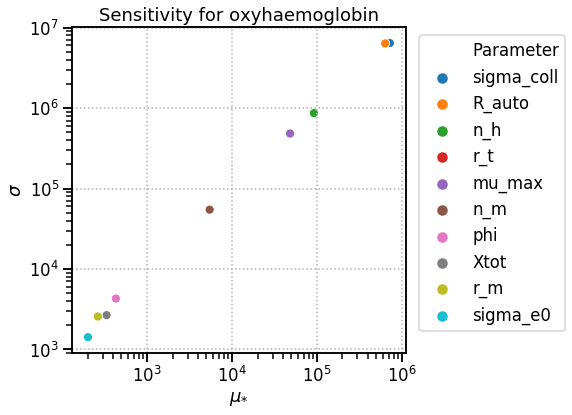

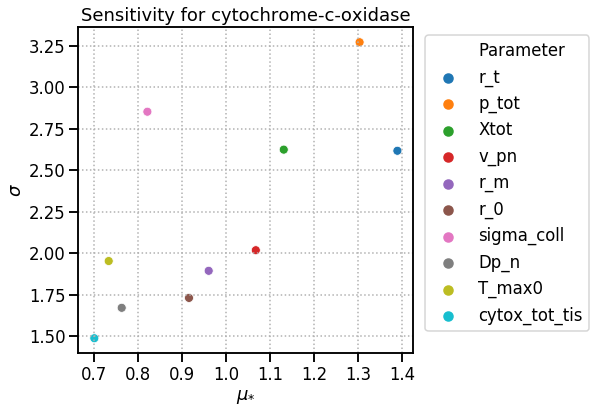

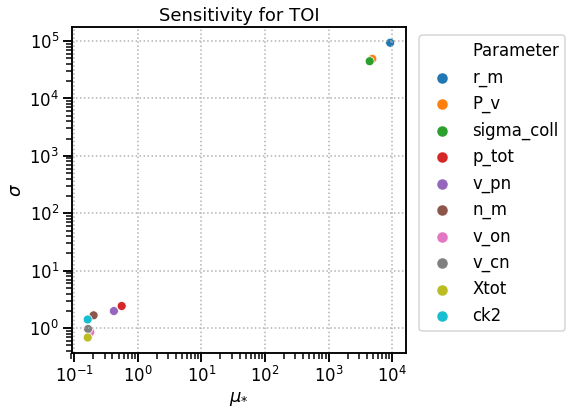

In [10]:
sim_data = {}
for output in ["TOTAL", "HHb", "HbO2", "CCO", "TOI"]:
    print("Working on {}". format(output))
    fig, ax, lgd, d = sensitivity(df_healthy, output, title_dict=sim_title_dict)
    sim_data[output]= d
    # fig.savefig("Figures/hypoxia/wide_params/healthy/{}_2d_sensitivity_sim.png".format(output), orientation='landscape', bbox_extra_artists=(lgd,), bbox_inches='tight')
    TIFF_exporter(fig, "{}_2d_sensitivity_sim".format(output), fig_dir="/home/buck06191/Dropbox/phd/PLOS_paper/paper/Figures/")

Working on TOTAL
Working on HbT
Working on HbD
Working on CCO
Working on TOI


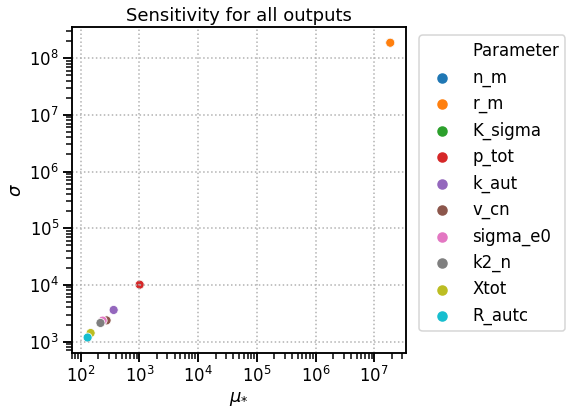

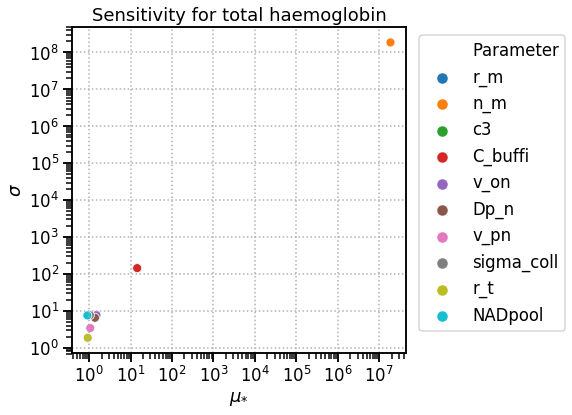

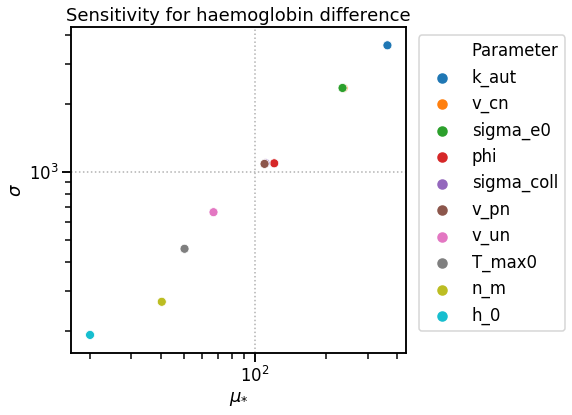

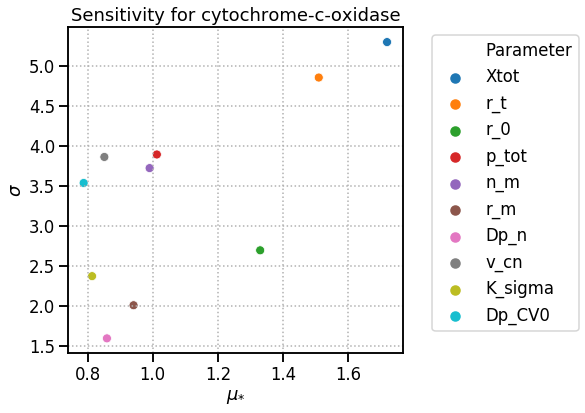

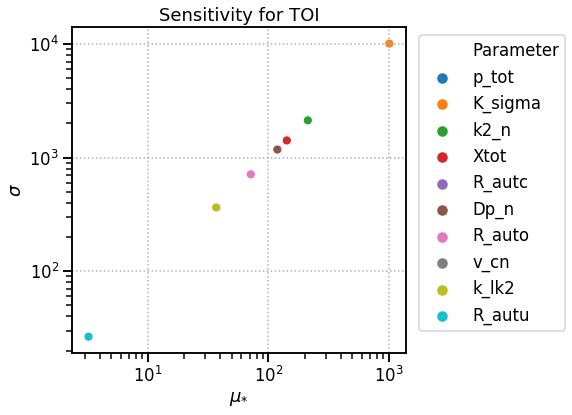

In [11]:
exp_data = {}
for output in ["TOTAL", "HbT", "HbD", "CCO", "TOI"]:
    print("Working on {}". format(output))
    fig, ax, lgd, d = sensitivity(df_experimental, output, title_dict=exp_title_dict)
    exp_data[output] = d
    # fig.savefig("Figures/hypoxia/experimental/filtered/wide_params/scaled_inflection/{}_2d_sensitivity_exp.png".format(output), orientation='landscape', bbox_extra_artists=(lgd,), bbox_inches='tight')
    TIFF_exporter(fig, "{}_2d_sensitivity_exp".format(output), fig_dir="/home/buck06191/Dropbox/phd/PLOS_paper/paper/Figures/")

In [12]:
exp_data["HbD"]

,mu_star,sigma,Parameter
45,363.793100,3615.108229,k_aut
107,237.322439,2341.860384,v_cn
95,234.859077,2344.876842,sigma_e0
82,120.699862,1091.736136,phi
94,110.923189,1092.234376,sigma_coll
109,109.838251,1085.243842,v_pn
110,66.799560,664.584040,v_un
100,50.369901,458.477244,T_max0
60,40.356422,267.707078,n_m
33,20.059267,191.232888,h_0


In [13]:
def sensitivity_barplot(df, output, title_dict=None):      
    params = [output+"_mu_star", output+"_sigma", "Parameter"]
    sens = df[params]
    sens = sens.rename(columns={output+"_mu_star": "mu_star", output+"_sigma": "sigma"})
    sens.sort_values(by="mu_star", ascending=False, inplace=True)
    sens_head = sens.head(10)
    
    with sns.plotting_context("talk"):
        fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))

        if output != "CCO":
            ax.set(xscale="log")
        #plt.grid(True, linestyle=':')
        ax = sns.barplot(y="Parameter", x="mu_star",edgecolor=".6", data=sens_head, ax = ax, color=sns.color_palette()[0]);

        ax.set_xlabel("$\mu_{*}$")
        if title_dict:
            ax.set_title("Ten most sensitive parameters for {}".format(title_dict[output]))
    
    return fig, sens_head



Working on TOTAL
Working on HHb
Working on HbO2
Working on CCO
Working on TOI


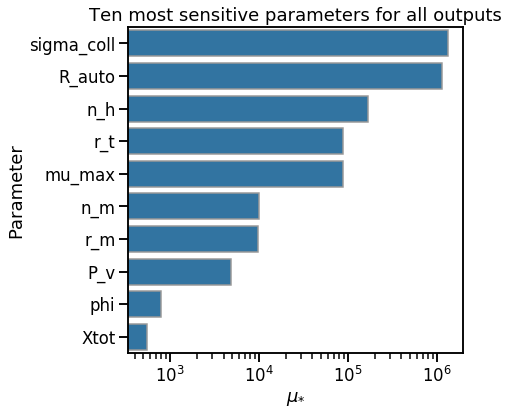

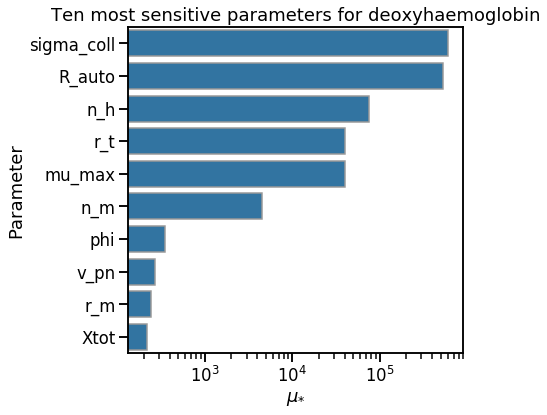

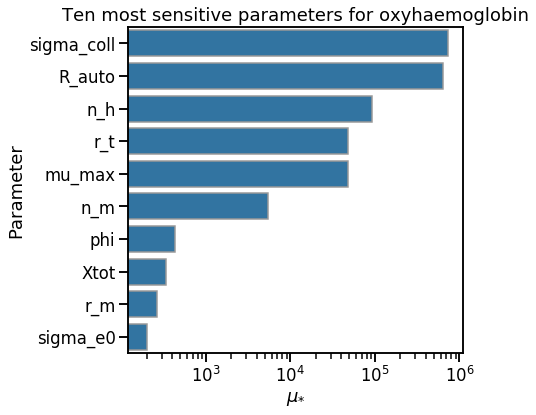

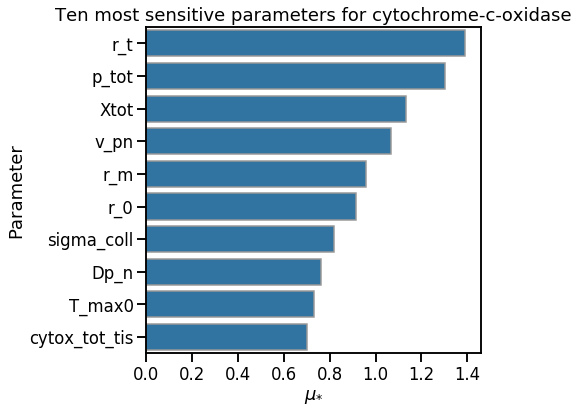

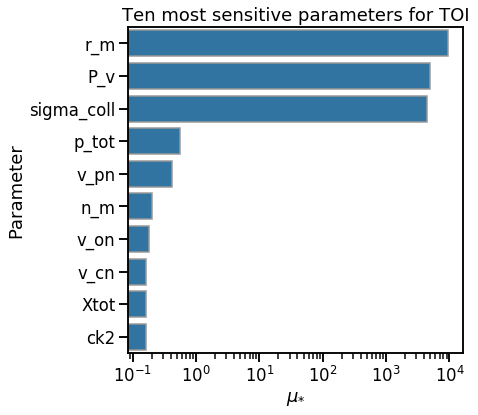

In [14]:
sim_data = {}
for output in ["TOTAL", "HHb", "HbO2", "CCO", "TOI"]:
    print("Working on {}". format(output))
    fig, d = sensitivity_barplot(df_healthy, output, title_dict=sim_title_dict)
    sim_data[output]= d
    #fig.savefig("Figures/hypoxia/wide_params/healthy/{}_barplot_sensitivity_sim.png".format(output), orientation='landscape', bbox_extra_artists=(lgd,), bbox_inches='tight')
    TIFF_exporter(fig, "{}_barplot_sensitivity_sim".format(output), fig_dir="/home/buck06191/Dropbox/phd/PLOS_paper/paper/Figures/")

Working on TOTAL
Working on HbT
Working on HbD
Working on CCO
Working on TOI


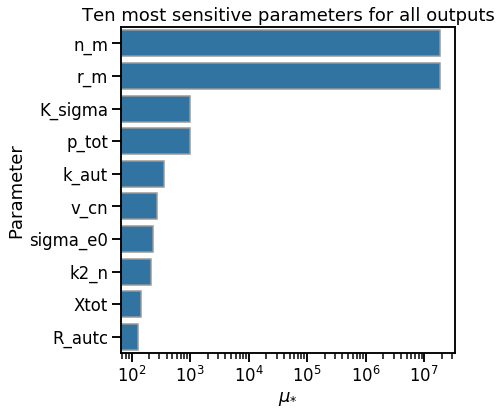

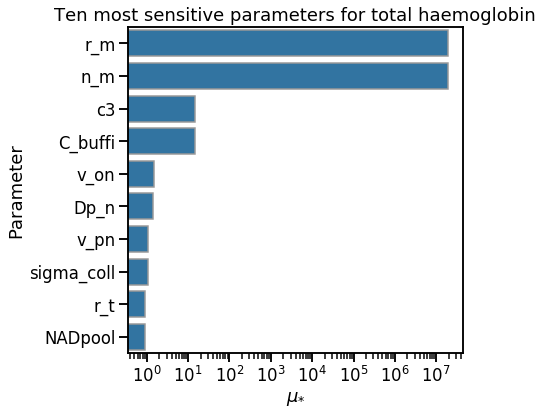

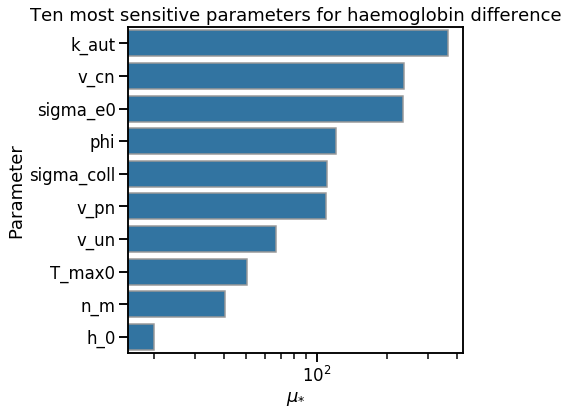

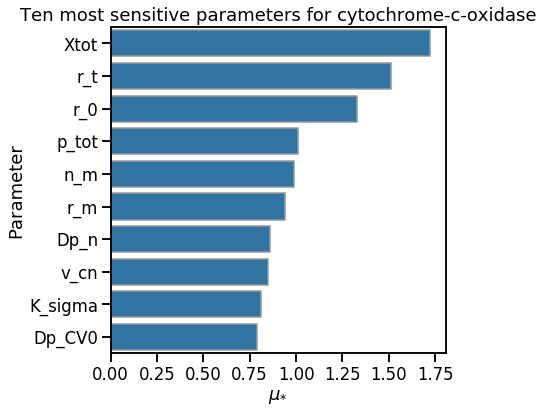

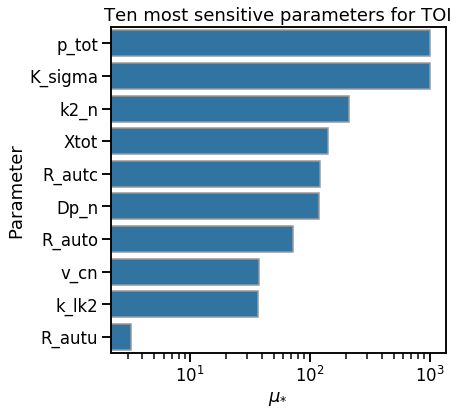

In [15]:
exp_data = {}
for output in ["TOTAL", "HbT", "HbD", "CCO", "TOI"]:
    print("Working on {}". format(output))
    fig, d = sensitivity_barplot(df_experimental, output, title_dict=exp_title_dict)
    exp_data[output] = d
    # fig.savefig("Figures/hypoxia/experimental/filtered/wide_params/scaled_inflection/{}_2d_sensitivity_exp.png".format(output), orientation='landscape', bbox_extra_artists=(lgd,), bbox_inches='tight')
    TIFF_exporter(fig, "{}_barplot_sensitivity_exp".format(output), fig_dir="/home/buck06191/Dropbox/phd/PLOS_paper/paper/Figures/")

In [16]:
sim_data['TOTAL']

,mu_star,sigma,Parameter
94,1.323512e+06,1.173506e+07,sigma_coll
85,1.161299e+06,1.161288e+07,R_auto
59,1.683126e+05,1.580217e+06,n_h
91,8.817823e+04,8.816979e+05,r_t
58,8.817130e+04,8.816985e+05,mu_max
60,9.974455e+03,9.970573e+04,n_m
89,9.773962e+03,9.311707e+04,r_m
76,4.881629e+03,4.881213e+04,P_v
82,7.850077e+02,7.835992e+03,phi
115,5.537116e+02,4.737377e+03,Xtot


In [17]:
sim_latex = sim_data['TOTAL'].drop('sigma', axis=1)
sim_latex = sim_latex[['Parameter', 'mu_star']]
print(sim_latex.to_latex(index=False))

\begin{tabular}{lr}
\toprule
  Parameter &       mu\_star \\
\midrule
 sigma\_coll &  1.323512e+06 \\
     R\_auto &  1.161299e+06 \\
        n\_h &  1.683126e+05 \\
        r\_t &  8.817823e+04 \\
     mu\_max &  8.817130e+04 \\
        n\_m &  9.974455e+03 \\
        r\_m &  9.773962e+03 \\
        P\_v &  4.881629e+03 \\
        phi &  7.850077e+02 \\
       Xtot &  5.537116e+02 \\
\bottomrule
\end{tabular}



In [18]:
exp_latex = exp_data['TOTAL'].drop('sigma', axis=1)
exp_latex = exp_latex[['Parameter', 'mu_star']]
print(exp_latex.to_latex(index=False))

\begin{tabular}{lr}
\toprule
Parameter &       mu\_star \\
\midrule
      n\_m &  1.873872e+07 \\
      r\_m &  1.873868e+07 \\
  K\_sigma &  1.013565e+03 \\
    p\_tot &  1.012443e+03 \\
    k\_aut &  3.646118e+02 \\
     v\_cn &  2.762865e+02 \\
 sigma\_e0 &  2.368302e+02 \\
     k2\_n &  2.174334e+02 \\
     Xtot &  1.478037e+02 \\
   R\_autc &  1.313413e+02 \\
\bottomrule
\end{tabular}



{'n_m'}

{'P_v',
 'R_auto',
 'Xtot',
 'mu_max',
 'n_h',
 'n_m',
 'phi',
 'r_m',
 'r_t',
 'sigma_coll'}